Your task for this homework will be to perform exploratory data analysis and predict if a 
person is prone to a heart attack (0 or 1). 

Answer the following:
Is this a classification or regression task and why? **This is a classification task as we are dealing prediction of a binary variable.**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1

In [114]:
data_df = pd.read_csv(filepath_or_buffer='data.csv')
data_df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [128]:
'''How many observations are there in total? 303 Observations'''
len(data_df)

303

In [116]:
'''Are there any missing values? There are no null values.'''
data_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [117]:
'''How many unique values are in each column?'''
for column in data_df.columns:
    print(column,"-", data_df[column].nunique())

age - 41
sex - 2
cp - 4
trtbps - 49
chol - 152
fbs - 2
restecg - 3
thalachh - 91
exng - 2
oldpeak - 40
slp - 3
caa - 5
thall - 4
output - 2


**Which columns will you treat as categorical, which will you take as continuous, and why?**

**Categorical: sex, cp, fbs, restecg, exng, caa, slp, thall, output**

**Continuous: age, trtbps, chol, thalachh, oldpeak**



# Step 2

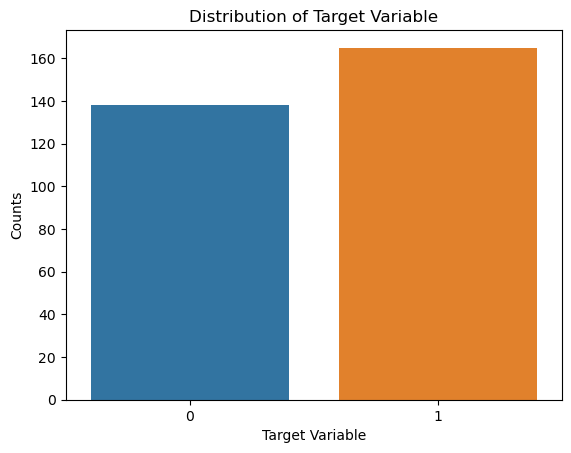

In [118]:
sns.countplot(x=data_df['output'])

plt.xlabel('Target Variable')
plt.ylabel('Counts')
plt.title('Distribution of Target Variable')

# Show plot
plt.show()


**The dataset is imbalanced as it is skewed towards one of the classes**

**Yes, it is important to work with a balanced dataset to avoid biases and make sure that when evaluating the model, it is accurate and fair.**

**To deal with an imbalanced dataset, there are many options like adding or removing observations or we can use resampling methods like k-fold to reduce overfitting.**

# Step 3

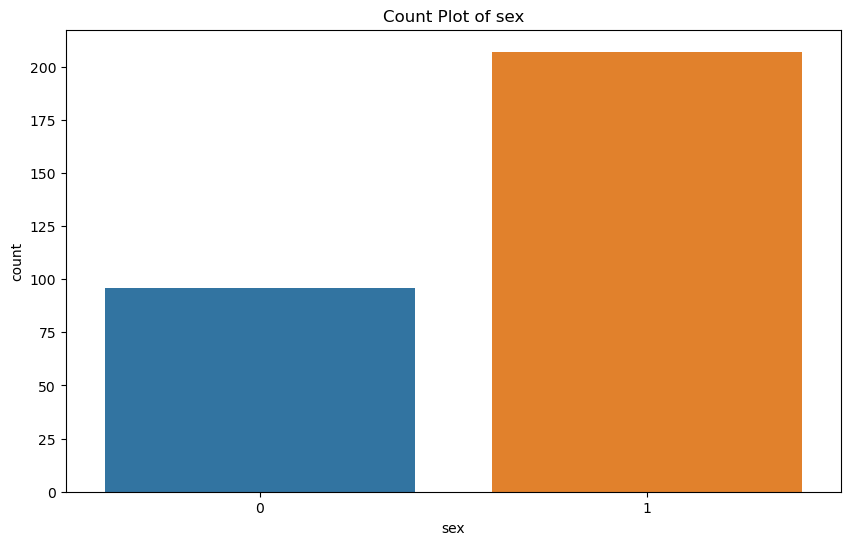

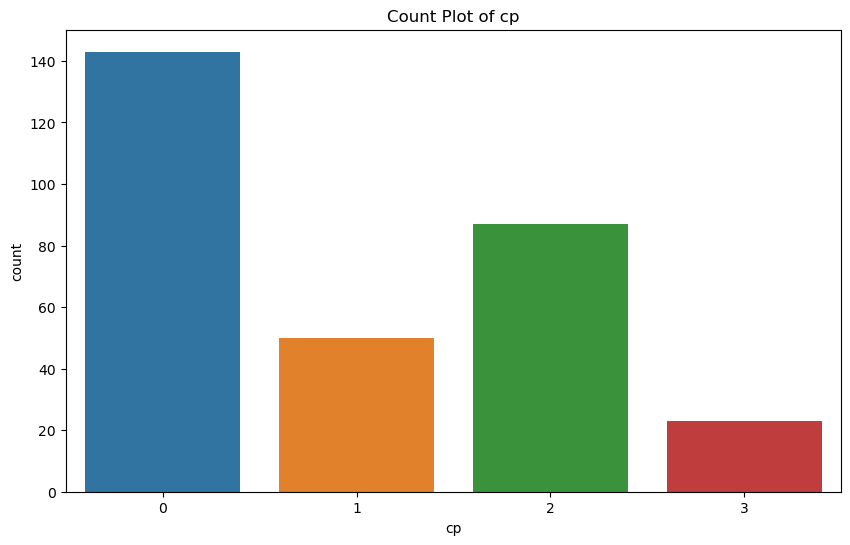

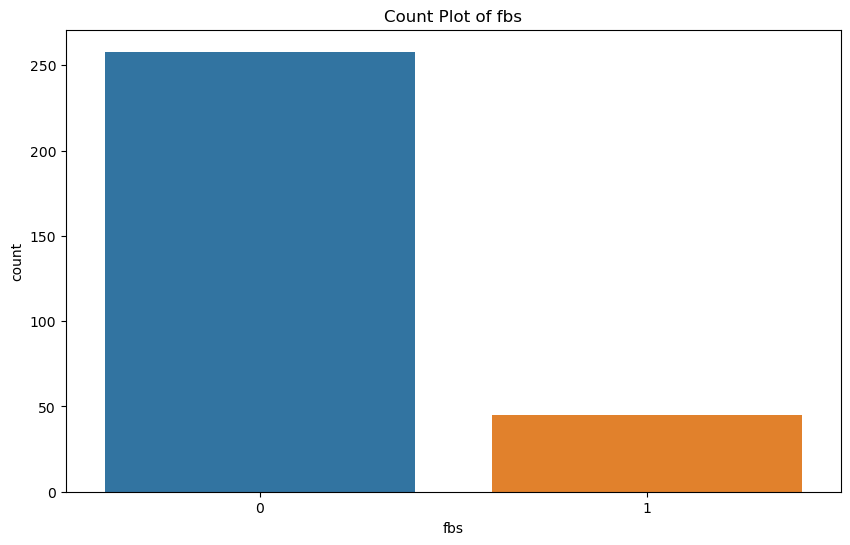

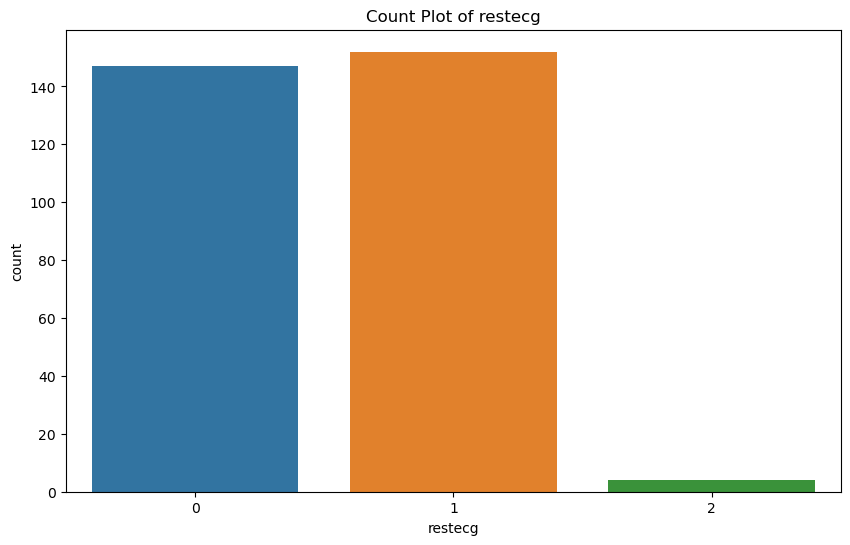

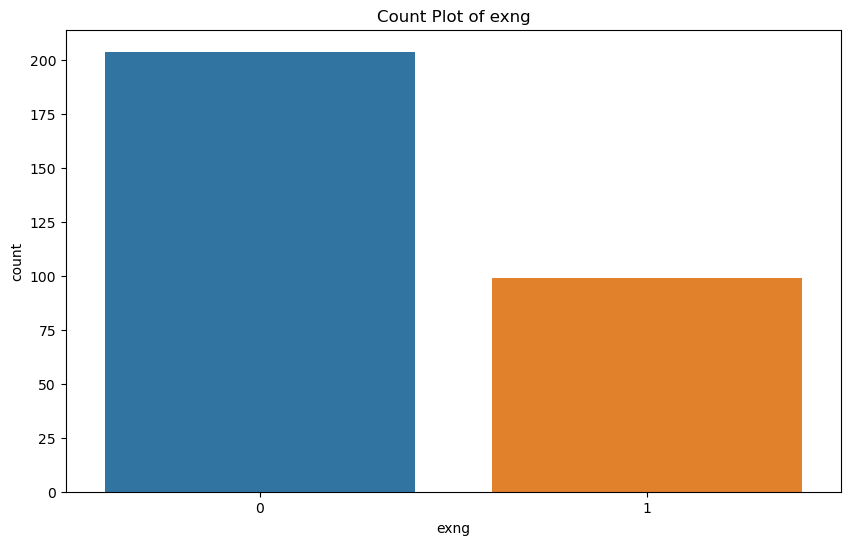

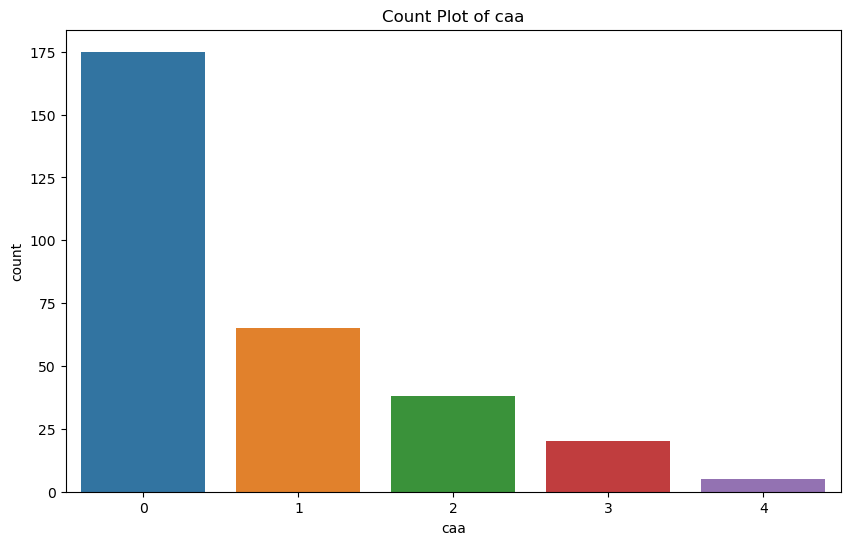

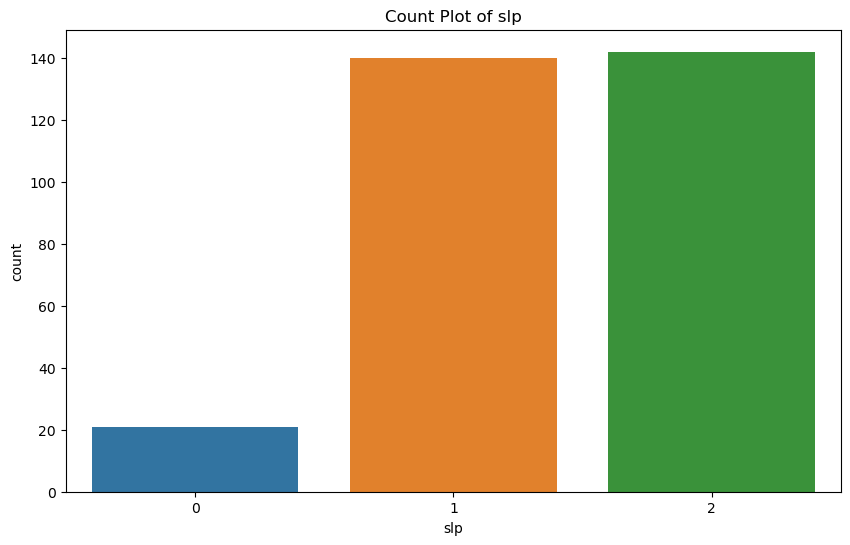

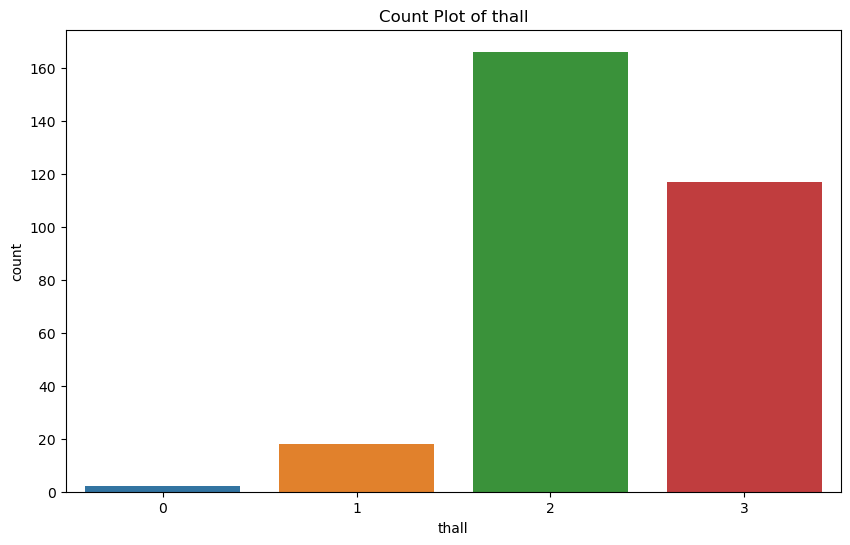

In [119]:
categorical_variables = data_df[['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'slp', 'thall']]
for var in categorical_variables.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=data_df)
    plt.title(f'Count Plot of {var}')
    plt.show()

**Some interesting finds seen in the graphs is that the plot for gender is skewed meaning that it might be inaccurate when predicting between genders.**


# Step 4

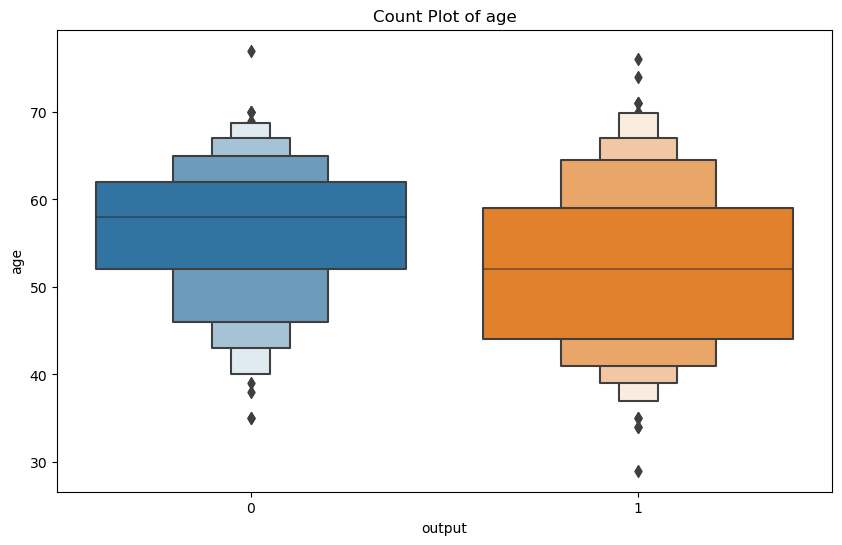

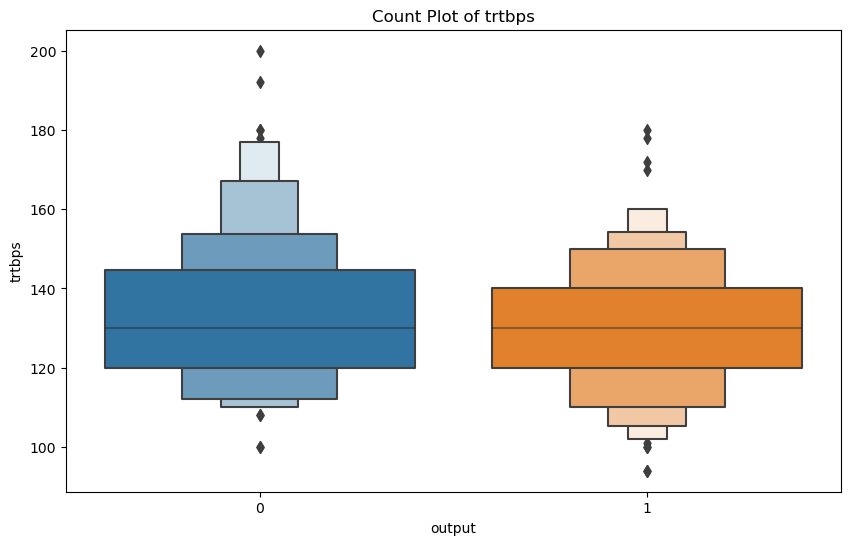

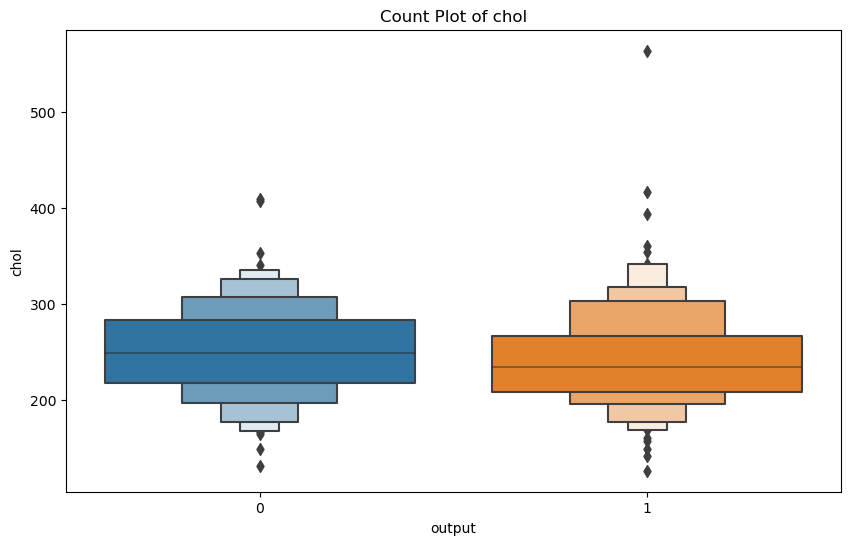

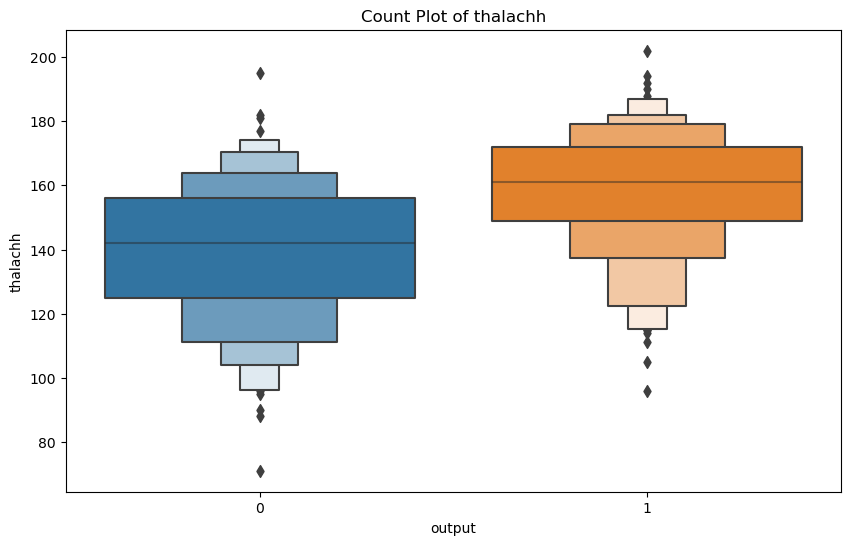

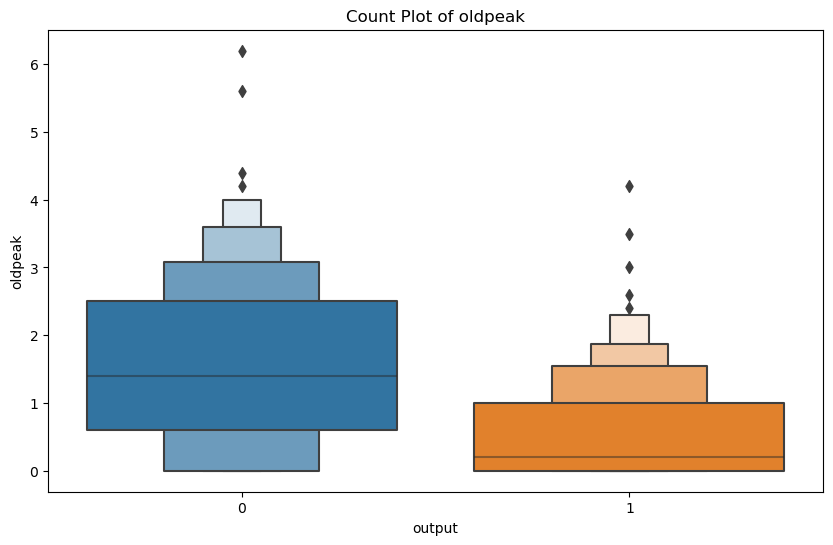

In [120]:
continuous_variables = data_df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for var in continuous_variables.columns:
    plt.figure(figsize=(10, 6))
    sns.boxenplot(x=data_df['output'], y= var, data=data_df)
    plt.title(f'Count Plot of {var}')
    plt.show()

**From the graphs, we can see the spread of values of each observation. The diamonds on the plots indicate values that fall outside the range and could potentiallly be outliers.**

# Step 5

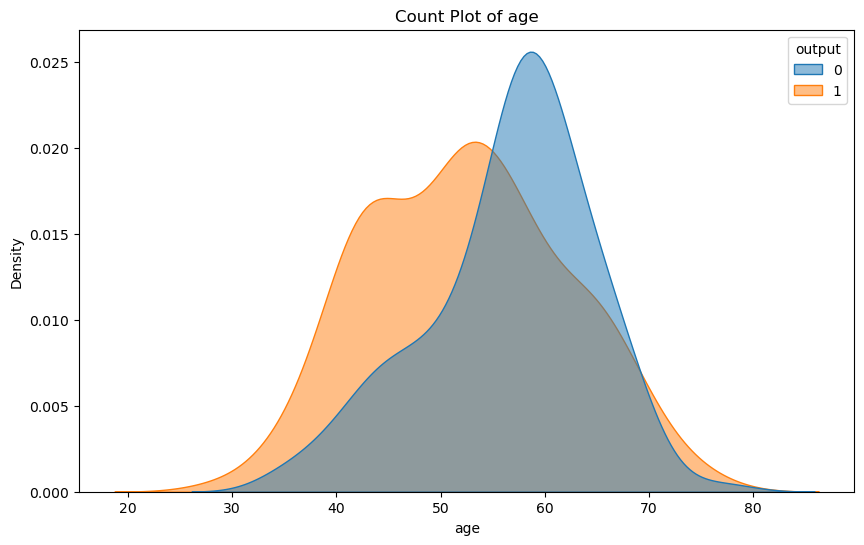

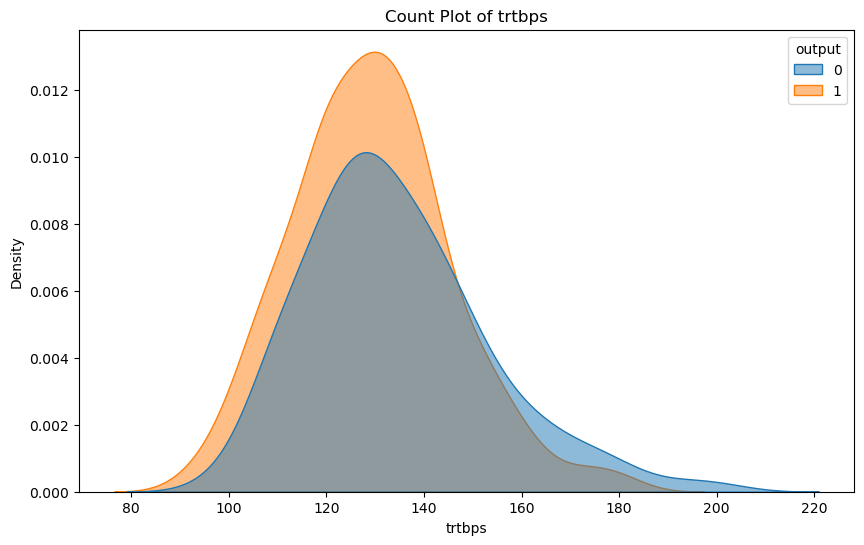

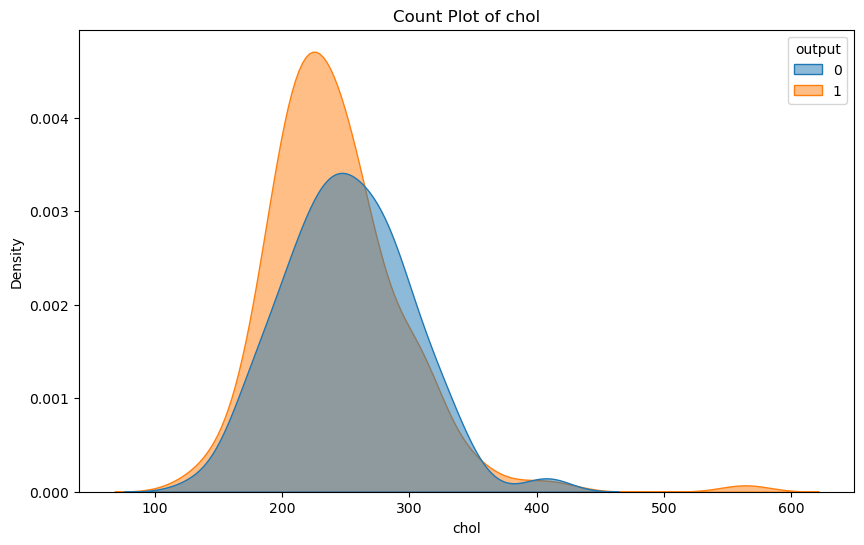

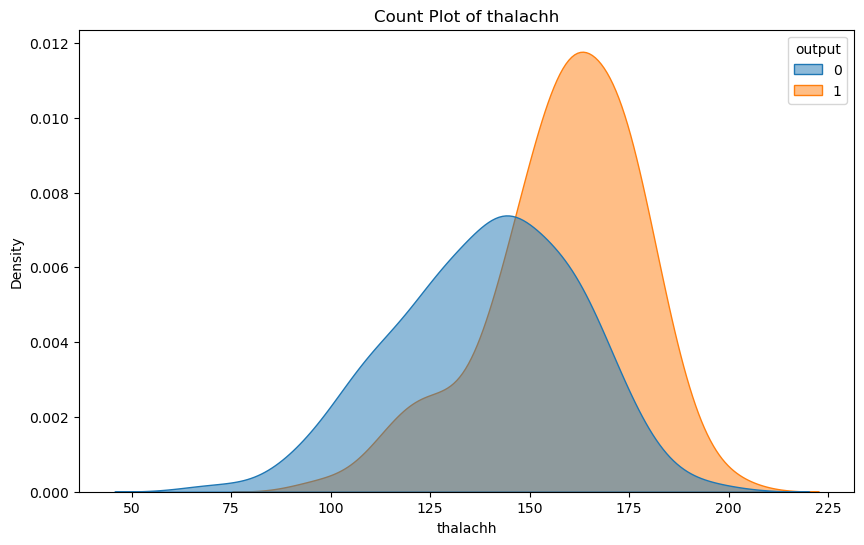

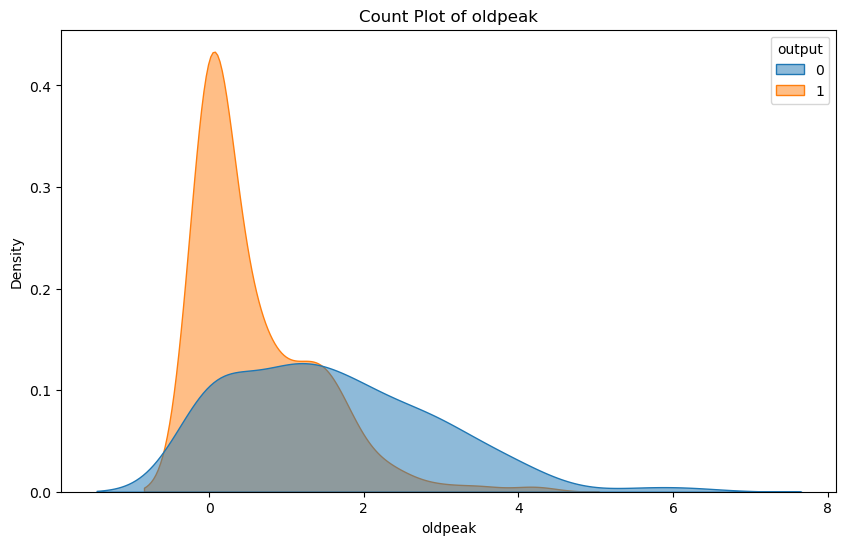

In [121]:
continuous_variables = data_df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for var in continuous_variables.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_df, x=var, hue="output", fill=True, alpha=.5, linewidth=1)        
    plt.title(f'Count Plot of {var}')
    plt.show()

**From the plots above, we can see the distribution of the continuous variables. The main thing we can see with the graphs is the density of each output in relation to the values of the continous variables. The peaks represent high density for that specific value of continuous variable meaning that observations with that value will more likely be that specific output. For example, in the age plot, those age 60 will most likely have an output variable of 0.**

# Step 6

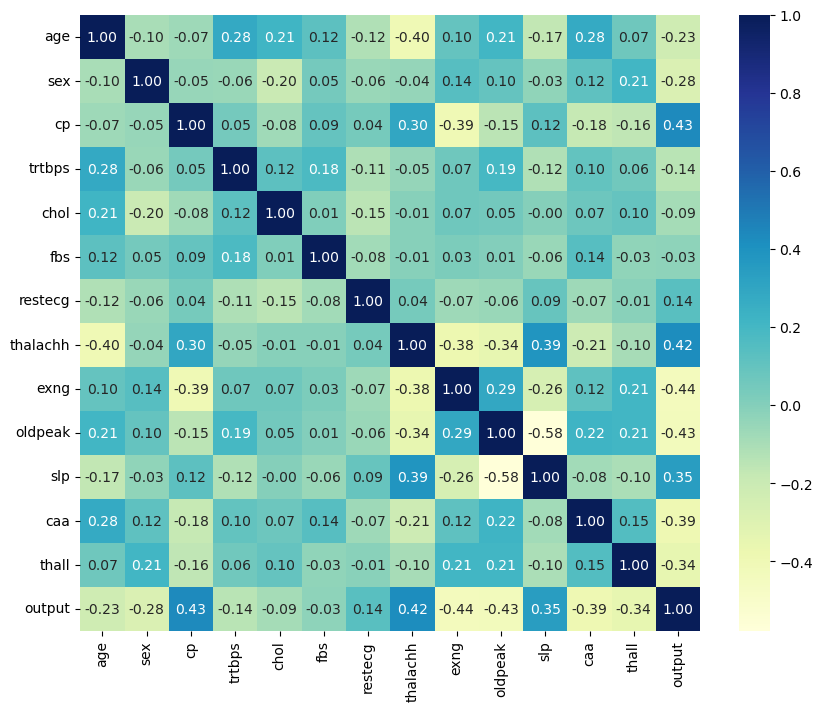

In [122]:
correlation_matrix = data_df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

**From the heatmap, we can see the correlation values between all of the variables in the dataset. According to the heatmap, we do not see any multi-collinearlity bewteen any variables.**

# Step 7

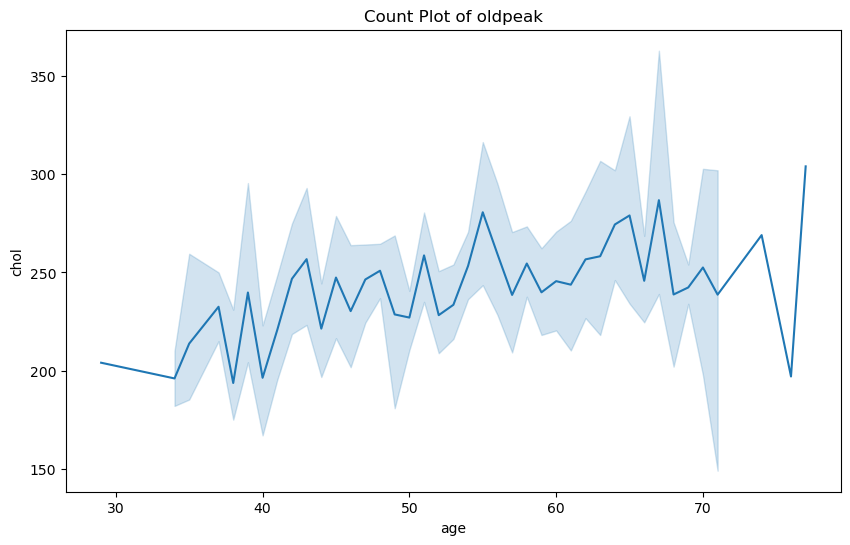

In [123]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_df, x='age', y='chol')
plt.title(f'Count Plot of {var}')
plt.show()

**I created a graph that plots chol vs. age. From the line plot, we can see that as age increases, we can see that chol will vary, increasing and decreasing, indicating that there might not be a strong correlation between the two variables.**

# Step 8

Name two different models that you can use to solve the problem statement.**To solve the problem statement above, we can use Logistic Regression and KNN as the problem is classification task.**

What is the difference between label encoding and one hot encoding, and when should you use one over the other? **Label encoding is assign categorical variables some integer value, while one-hot encoding is create a new column per categorical indicating whether or not the variable is present or not. Label encoding is preferred when the categorical variables are ordinal, while one-hot encoding is preffered for nominal variables.**

What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data? **Multicollinearity is when two predictor variables are highly correlated with each other, resulting in inaccurate coefficients and misleading interpretations between the predictors and reponse. To check if multicollinearity exists, we can use a correlation matrix check for any values close to -1 or 1 indicating high multicollinearity.**

Why is scaling data important? **Scaling data makes sure that variables' influence is consistent among all variables as numerical scales vary between variables. Scaling data can result in less biased data and improved model performance.**

For the two different models that you named earlier, are they using a parametric or non-parametric learning algorithms? What’s the difference?
**Logistic Regression is a parametric learning algorithm, while KNN is a non-parametric learning algorithm. The difference is that parametric algorithms have a fixed number of predictor variables and stronger assumptions about the data, while non-parametric is not fixed and does not make the strong assumptions parametric does.**

That we had missing values in our dataset. What are different ways we could handle them? **The different ways of handling missing values is either deletion or imputation.**

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        45
           1       0.83      0.93      0.88        46

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

              precision    recall  f1-score   support

           0       0.59      0.51      0.55        45
           1       0.58      0.65      0.61        46

    accuracy                           0.58        91
   macro avg       0.58      0.58      0.58        91
weighted avg       0.58      0.58      0.58        91



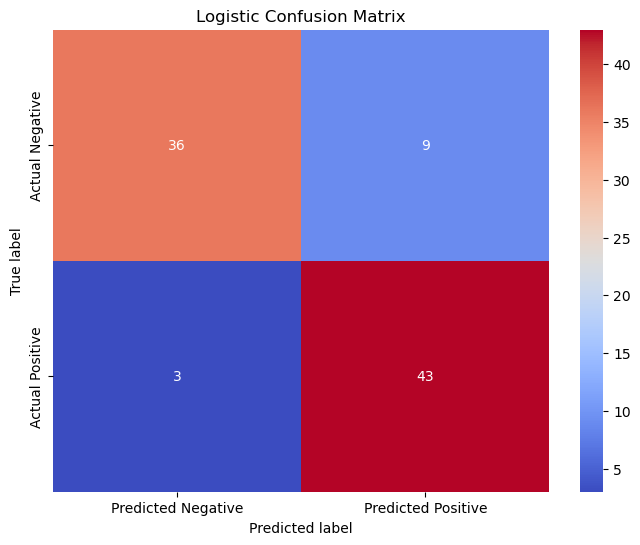

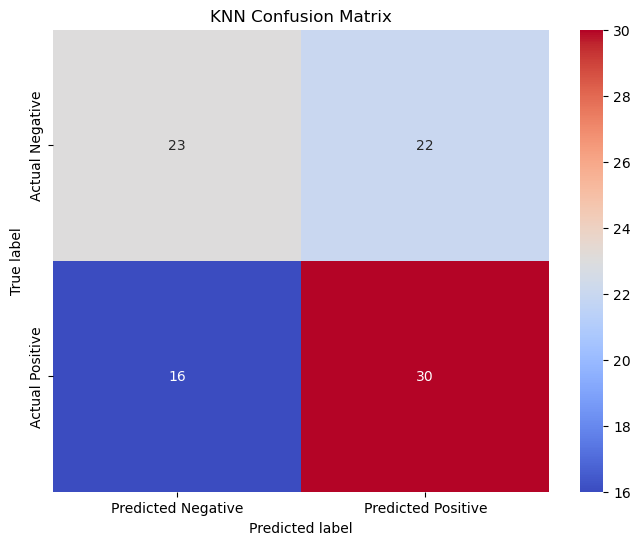

Logisitic Mean Accuracy: 0.8249180327868852
KNN Mean Accuracy: 0.6109289617486339


In [127]:
warnings.simplefilter("ignore")

# Logistic Regression
y = data_df['output']
X = data_df.drop(columns = ['output'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# K Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print(classification_report(y_test, logistic_predictions))
print(classification_report(y_test, knn_predictions))


cm_log = confusion_matrix(y_test, logistic_predictions)
cm_knn = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, cmap='coolwarm', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='coolwarm', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('KNN Confusion Matrix')
plt.show()

scores_log = cross_val_score(logistic_model, X, y, cv=5)
scores_knn = cross_val_score(knn_model, X, y, cv=5)

print(f'Logisitic Mean Accuracy: {scores_log.mean()}')
print(f'KNN Mean Accuracy: {scores_knn.mean()}')

**When creating the logisitc and KNN models, I did not decide to scale the data as I saw no reason or need to. I chose the models because the problem statement involved a classification task and they are simple to implement and interpret. Comparing the two models, we can see that the logistic regression model has better metrics all around compared to KNN.Using cross-validation, we can see that the mean accuracy of logistic is 83% while KNN has a mean accuracy of 61%.**